### Análisis de eficiencia algoritmo greedy vs batching

#### Importamos las librerías correspondientes para el análisis de los datos.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Primero, armamos el data frame correspondiente.

In [32]:
df = pd.read_csv('../greedy_vs_batching.csv')
df.tail()

,zb,zg,gap,filename
35,1255.4,1441.5,0.129102,xl_5.csv
36,1521.8,1737.4,0.124093,xl_6.csv
37,1417.4,1705.1,0.168729,xl_7.csv
38,1243.5,1512.7,0.177960,xl_8.csv
39,1309.4,1531.7,0.145133,xl_9.csv


##### Renombres para los gráficos

In [33]:
dict = {"small": "s", "medium": "m", "large": "l"}
df['filename'] = df['filename'].replace(dict, regex=True)
df['filename'] = df['filename'].replace({"_": ""}, regex=True)
df['filename'] = df['filename'].apply(lambda x: x.split('.')[0])

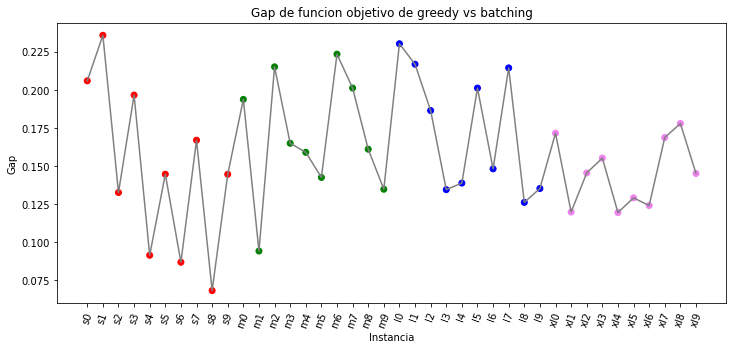

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title('Gap de funcion objetivo de greedy vs batching')
ax.set_xlabel('Instancia')
ax.set_ylabel('Gap')
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=0.1)

colours = {"s": "red", "m": "green", "l": "blue", "x": "violet"}

plt.scatter(df['filename'], df['gap'], c=df['filename'].apply(lambda x: colours[x[0]]), label='greedy vs batching')
plt.plot(df['filename'], df['gap'], label='greedy vs batching', color = "grey")


##### Armamos un plot de los gaps con respecto a los filenames

In [37]:
df_small = df[df['filename'].apply(lambda x: x[0] == 's')]
df_medium = df[df['filename'].apply(lambda x: x[0] == 'm')]
df_large = df[df['filename'].apply(lambda x: x[0] == 'l')]
df_xlarge = df[df['filename'].apply(lambda x: x[0] == 'x')]

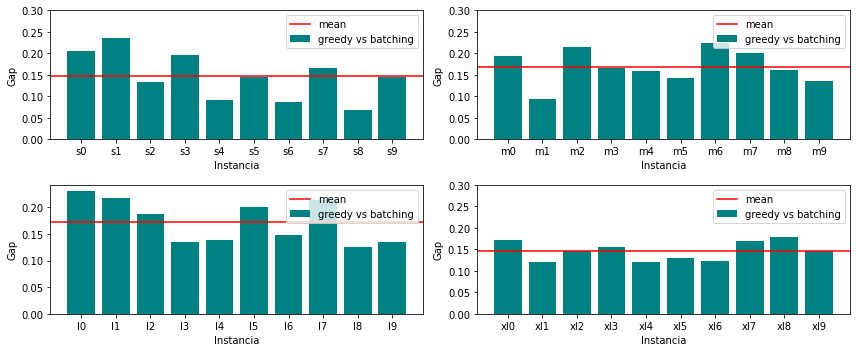

In [54]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 5))


ax1.set_xlabel('Instancia')
ax1.set_ylabel('Gap')
ax1.axhline(df_small['gap'].mean(), color='red', label='mean')
ax1.bar(df_small['filename'], df_small['gap'], label='greedy vs batching', color='teal')
ax1.set_ylim(0, 0.3)
ax1.legend()


ax2.set_xlabel('Instancia')
ax2.set_ylabel('Gap')
ax2.axhline(df_medium['gap'].mean(), color='red', label='mean')
ax2.bar(df_medium['filename'], df_medium['gap'], label='greedy vs batching', color='teal')
ax2.set_ylim(0, 0.3)
ax2.legend()


ax3.set_xlabel('Instancia')
ax3.set_ylabel('Gap')
ax3.axhline(df_large['gap'].mean(), color='red', label='mean')
ax3.bar(df_large['filename'], df_large['gap'], label='greedy vs batching', color='teal')
ax2.set_ylim(0, 0.3)
ax3.legend()


ax4.set_xlabel('Instancia')
ax4.set_ylabel('Gap')
ax4.axhline(df_xlarge['gap'].mean(), color='red', label='mean')
ax4.bar(df_xlarge['filename'], df_xlarge['gap'], label='greedy vs batching', color='teal')
ax4.set_ylim(0, 0.3)
ax4.legend()

fig.tight_layout()

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.boxplot([df_small['gap'], df_medium['gap'], df_large['gap'], df_xlarge['gap']], labels=['small', 'medium', 'large', 'xlarge'])